In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.ProbBidClearing import ProbBidClearing

In [20]:
## Initialize ProbBidClearing Object

std = 10                 # standard deviation 
risky_mean = 20          # bid above RTP
conservative_mean = -15  # bid below RTP

# To Do : add in default initialization
clearer = ProbBidClearing(std, risky_mean, conservative_mean)

### Attitude Based Bidding

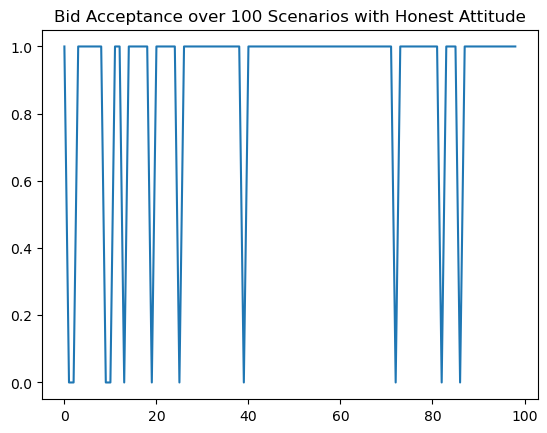

In [29]:
## Test if the discharge bid was accepted

# Sample bidding environment
RTP = 30.02044
bid = 36.13978
SOC = 0.5
attitude = "honest"

accept = []
n = 100

# Test norm prob clear over n scenarios
for i in range(1,n):
    accept.append(clearer.norm_prob_clear(RTP, bid, attitude, SOC))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with " + attitude.capitalize() + " Attitude")
plt.show()

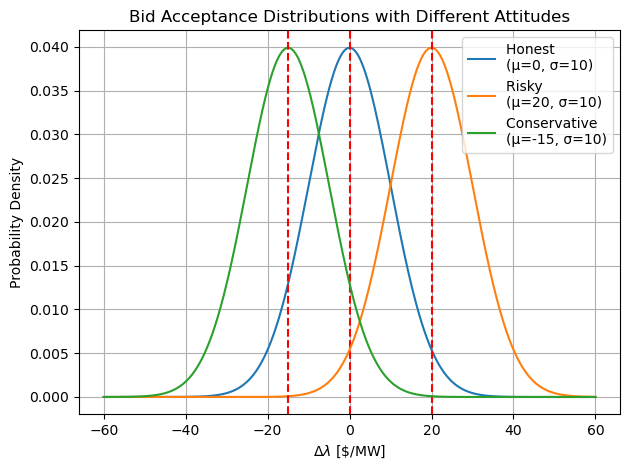

In [27]:
clearer.visualize_norm_attitudes()

### Custom Bidding

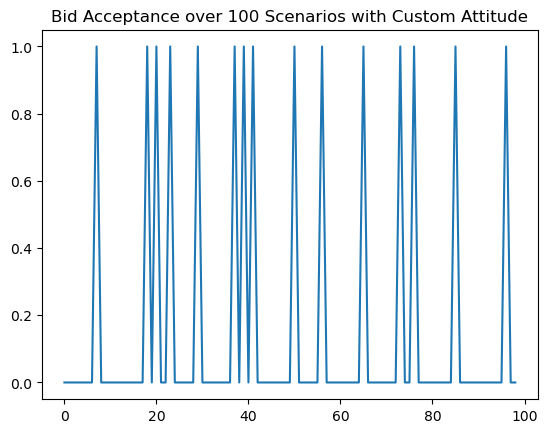

In [55]:
## Test if custom the discharge bid was accepted
bid = 40
mean = 0
std = 5

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.custom_norm_prob_clear(RTP, bid, SOC, mean, std))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with Custom Attitude")
plt.show()

### Time-Varying Bidding

#### Data Collection

In [47]:
# Pull dataset
ENERGY_STORAGE_DATA_PATH = (
    "./src/CAISO-EnergyStorage/src/data/ES_BIDS/CAISO_ES_BIDS.parquet"
)

# Read parquet file
STORAGE_DF = pd.read_parquet(ENERGY_STORAGE_DATA_PATH)
# Isolate demand data
demand_data = STORAGE_DF[['tot_energy_rtpd']]
# Extract time of day
demand_data['time_of_day'] = demand_data.index.time
# Compute average demand for each 5-minute interval
avg_profile = demand_data.groupby('time_of_day')['tot_energy_rtpd'].mean()
# Convert index to string for plotting 
avg_profile.index = avg_profile.index.map(lambda x: x.strftime('%H:%M'))

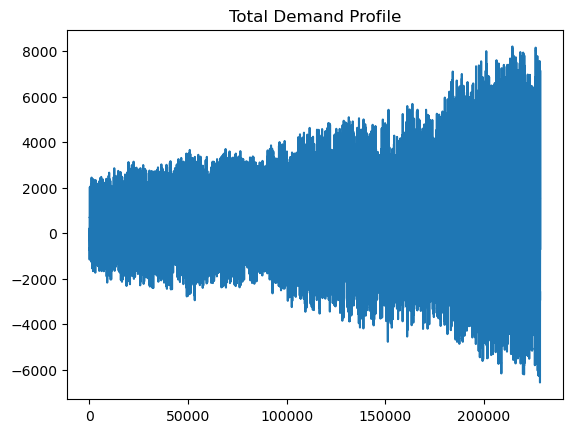

In [155]:
## Visualize entire time-series dataset

plt.plot(demand_data.tot_energy_rtpd.to_numpy())
plt.title('Total Demand Profile')
plt.show()

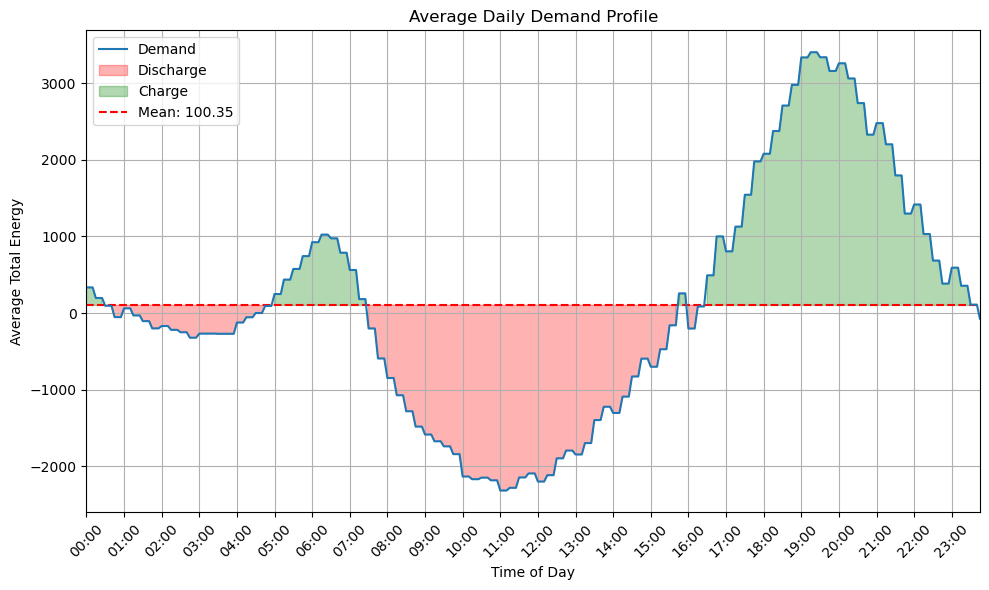

In [187]:
## Plot the average daily profile

# Calculate the mean
mean_value = avg_profile.mean()

# Create the figure
plt.figure(figsize=(10, 6))


mean_line = plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
demand, = plt.plot(avg_profile.index, avg_profile.values)
fill_red = plt.fill_between(avg_profile.index, avg_profile.values, mean_value, where=(avg_profile.values < mean_value), color='red', alpha=0.3)
fill_green = plt.fill_between(avg_profile.index, avg_profile.values, mean_value, where=(avg_profile.values > mean_value), color='green', alpha=0.3)

plt.title('Average Daily Demand Profile')
plt.xlabel('Time of Day')
plt.ylabel('Average Total Energy')
tick_positions = avg_profile.index[::12]  # Select every hour entry for the ticks
plt.xticks(tick_positions, rotation=45)
plt.xlim("00:00", "23:45")
plt.grid(True)
plt.tight_layout()
plt.legend([demand, fill_red, fill_green, mean_line], 
           ['Demand', 'Discharge', 'Charge', f'Mean: {mean_value:.2f}'],
           loc='upper left')
plt.show()

In [165]:
mean_value = avg_profile.mean()